# Dimensionality Reduction

The Curse of Dimensionality 214
- Main Approaches for Dimensionality Reduction 215
   - Projection 215
   - Manifold Learning 218
- PCA 219
   - Preserving the Variance 219
   - Principal Components 220
   - Projecting Down to d Dimensions 221
   - Using Scikit-Learn 222
   - Explained Variance Ratio 222
   - Choosing the Right Number of Dimensions 223
   - PCA for Compression 224
   - Randomized PCA 225
   - Incremental PCA 225
- Kernel PCA 226
   - Selecting a Kernel and Tuning Hyperparameters 227
- LLE 230
- Other Dimensionality Reduction Techniques 232
- Exercises                               233


## The Curse of Dimensionality 

- As Dimensional of dataset get higher, the average distance between two instance will be roughly increase. 
- So high dimensional datasets are at rist of being very sparse, most training instances are likely to be far away from each other. 
- The more dimensions the training set has, the greater the risk of overfitting it.
<br>

**In theory** 
- One solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of trainging instances 
<br>

**In practice** 
- The number of training set to reach a sufficient density grows exponentially.
- Plus assuming they were spread out uniformly across all dimensions 

---

## Main approaches for Dimensionality Reduction

### Projection
- Training instances are not spread out uniformly across all dimensions 
- Many features are almost constant 
- While others are highly correlated 
- So all training instances lie within (close to) a much lower-dimensional subspace of the high-dimensional space

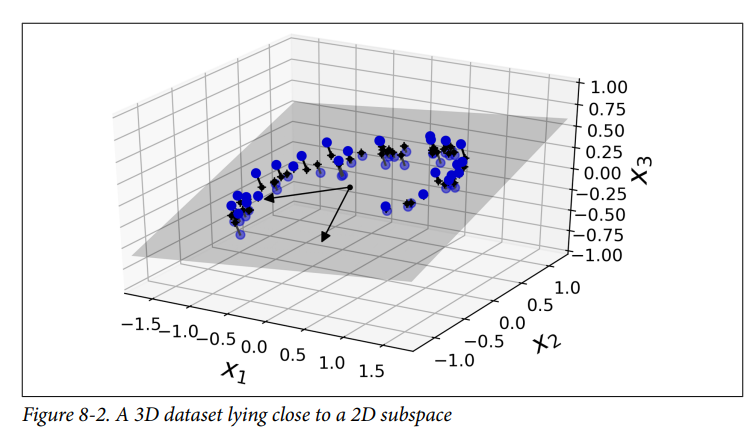

- After project every training instance perpendicularly onto 2D subspace, we get 

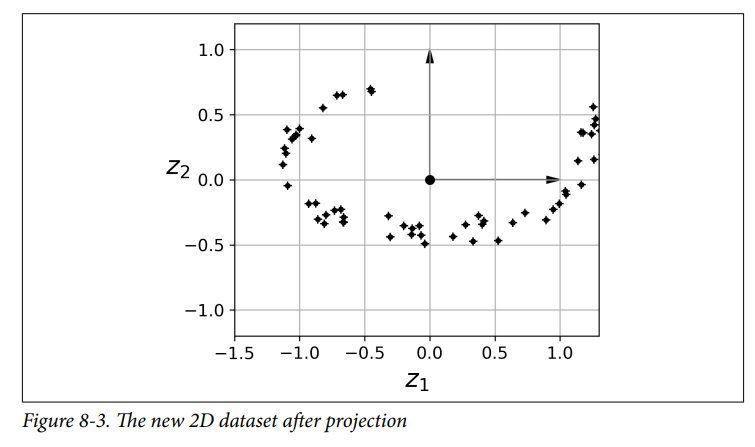

- Projection problem:
    - However, projection is not always the best approach to dimensionality reduction.
    - In many cases the subspace may twist and turn (such as in Swiss roll toy dataset as below figures).

- Swiss roll dataset in 3D 

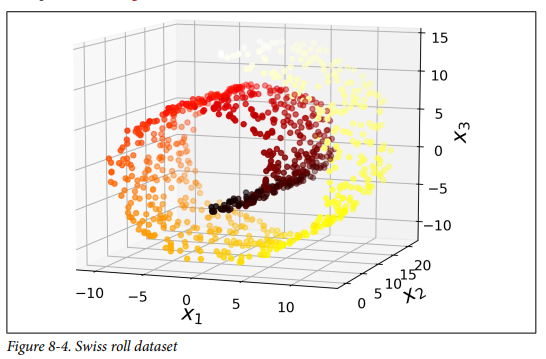

- Applying projection vs unrolling it

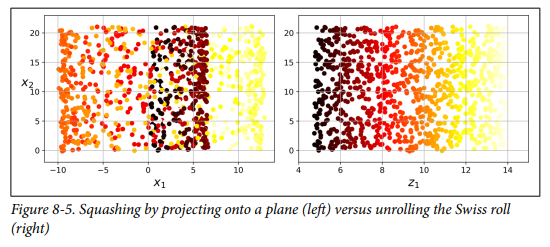

## Manifold learning

**Manifold learning:**

- Many dimensionality reduction algorithms work by modeling the manifold on which
the training instances lie.
- it relies on the manifold assumption

**Manifold Assumption(hypothesis):**
- most real-world high-dimensional datasets lie close to a much lower-dimensional manifold


- In some cases (but not always)
    - The task at hand (e.g., classification or regression) will be simpler if expressed in the
      lower-dimensional space of the manifold (i)

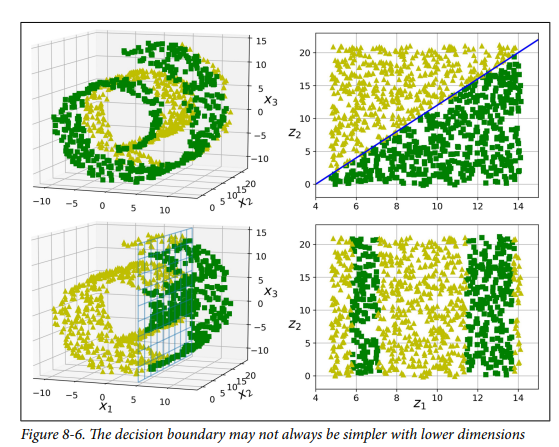


- However, (i) does not always hold


**Reducing the dimensionality of your training set before training a model will usually speed up training**


## PCA 

**Principal Component Analysis (PCA)**
- Is by far the most popular dimensionality reduc‐tion algorithm
- Steps
    - First, it identifies the hyperplane that lies closest to the data
    - Second, it projects the data onto it


**Preserving the Variance**
- Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane

- select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections

    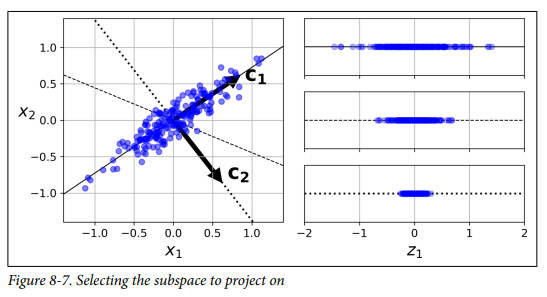


- Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis

**Principal Components**
- PCA identifies the axis that accounts for the largest amount of variance in the training set, (c1,c2,...) such that all of them are **Orthogonal to each other** (We say that 2 vectors are orthogonal if they are perpendicular to each other. i.e. the dot product of the two vectors is zero.)

- How to find PC vectors? 
    - by using Singular Value Decomposition(SVD) over the training set matrix X into  the matrix multiplication of three matrices U Σ V, where V contains the unit vectors that define all the principal components that we are looking for

**Projecting Down to d Dimensions**

   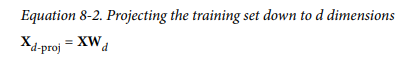

Where Wd is the matrix containing the first d columns of V

### Using Scikit-Learn PCA class

- Scikit-Learn's PCA class uses SVD decomposition to implement PCA 
- pca.components_ attribute holds the transpose of Wd matrix 
- pca.explained_variance_ratio_ holds variance ratio of each PC

**How to choose the right number of dimensions?**
- determine the percentage of variance that you need to perserve and pass it to n_components as a float (between 0.0 to 1.0)

    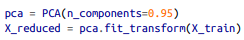

- Another way to visualize the varaince as a function of the number of dimensions (elbow curve)

    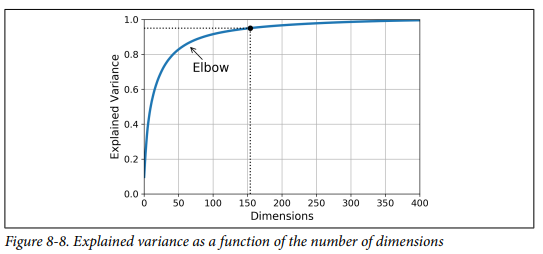


### PCA for Compression

- After applying PCA, the training set takes up much less space 
- It's also possible to decompress the reduced dataset back 
- **Reconstruction Error**: is the mean squared distance between the original data and the reconstructed data (Compressed and decompressed)

    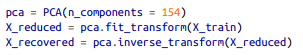

- The equation of the inverse transformation back to the original number of dimensions
  
    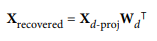


### Randomized PCA 

- is a stochastic algorithm that quickly finds an approximation of the first d principal components 
- its computational complexity is O(m * d^2) + O(d^3) instead of O(m*n^2) + O(n^3) 
- Code sample:

    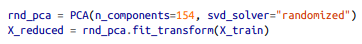

-  Sckiti-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m or n

### Incremental PCA

- One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run.
- Incremental PCA allow us to split the training set into **mini-batches** and feed it to the algorithm one mini-batch at a time 
- It's useful for :
     - for large training sets 
     - for applying PCA online

- Code sample:

    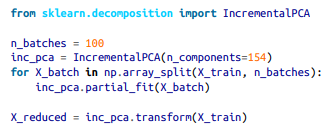

## Kernel PCA

- It is possible to perform complex nonlinear projections for dimensionality reduction 
- The following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF kernel

    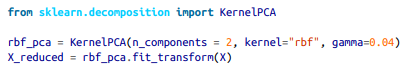

- Linear vs RBF vs Sigmoid kernels :

    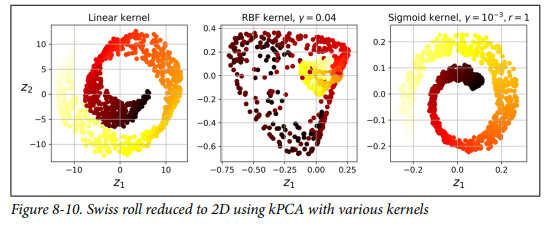

**How to select a kernel and tuning hyperparameters?**
- kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.
- Two Approaches: 
    <br>
    1- if we use PCA as a prepartion step, then we can use grid search for example to find the best kenerals and hyperparameters 

    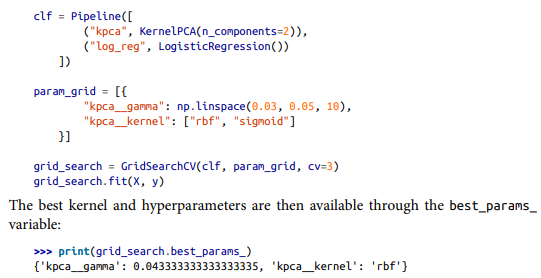
   <br> 
   
    2- if we use it entirely unsupervised, we will select the kernel that yields the lowest reconstruction error
        
    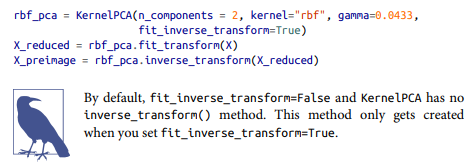

    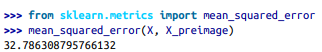

## LLE

- Locally Linear Embedding (LLE) is another powerful nonlinear dimensionality reduction (NLDR) technique. 
- It is a Manifold Learning technique that does not rely on projections

- Code sample:
    
     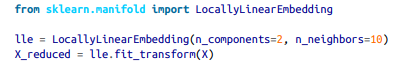

- it's good at unrolling twisted manifolds

**How it works?**

1- Measure how each training instance linearly relates to it's closes neighbors 

   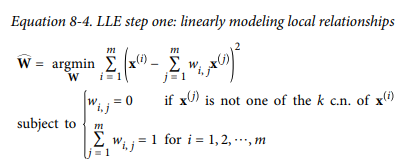


2- Looking for a low-dimensional that perserve these local relationships

   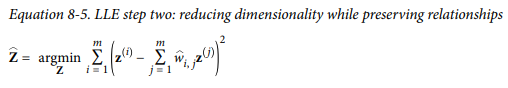

**algorithm scales poorly to very large datasets**
- since the complexity of constructing the low-dimensional is O(dm^2)

## Other Dimensionality Reduction Techniques 

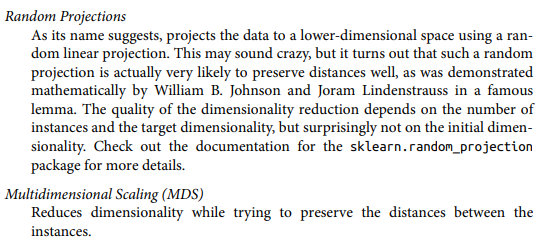

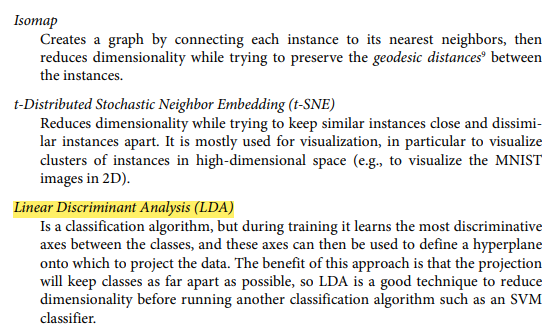

## Exercises